Лабораторная работа №4

Вариант №17

Выполнил Плешко Георгий

4.1.17, 4.2, 4.5.3, 4.8.4


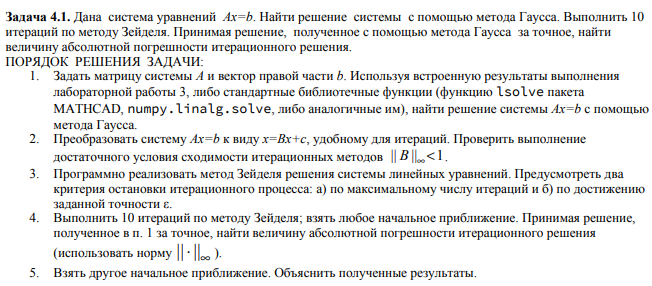

In [1]:
from IPython.display import Image
Image("Lab4_1.png")

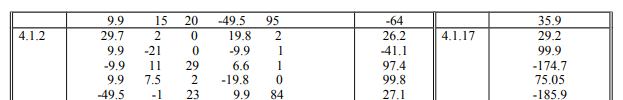

In [2]:
Image("Lab4_117.png")

In [3]:
import numpy as np
#Задание матрицы А и вектора свободных членов b
A = np.array([[29.7, 2, 0, 19.8, 2], [9.9, -21, 0, -9.9, 1], [-9.9, 11, 29, 6.6, 1], [9.9, 7.5, 2, -19.8, 0], [-49.5, -1, 23, 9.9, 84]])
b = np.array([29.2, 99.9, -174.7, 75.05, -185.9])
print(A)
print(b)

[[ 29.7   2.    0.   19.8   2. ]
 [  9.9 -21.    0.   -9.9   1. ]
 [ -9.9  11.   29.    6.6   1. ]
 [  9.9   7.5   2.  -19.8   0. ]
 [-49.5  -1.   23.    9.9  84. ]]
[  29.2    99.9  -174.7    75.05 -185.9 ]


In [4]:
x_gs = np.linalg.solve(A,b)
D = np.zeros(A.shape)
D_inv = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i][i] = A[i][i]
    D_inv[i][i] = 1/A[i][i]
B = np.dot(D_inv,D - A)
c = np.dot(D_inv,b)
B_norm = np.linalg.norm(B, ord = np.inf)

In [7]:
from scipy.linalg import solve_triangular
def Zeidel(A, b, x0, eps = 1e-6, it_num = None):
    L = np.tril(A, k = -1)
    D = np.diag(np.diag(A))
    U = np.triu(A, k = 1)
    L_D_inv = solve_triangular(L+D,np.eye(A.shape[0]), lower = True)
    count = 0
    x_curr = x0
    x_next = -np.dot(np.dot(L_D_inv,U),x_curr) + np.dot(L_D_inv,b)
    while count != it_num and np.max(np.abs(x_next - x_curr)) > eps:
        x_curr = x_next
        count += 1
        x_next = -np.dot(np.dot(L_D_inv,U),x_curr) + np.dot(L_D_inv,b)
    if count == it_num:
        print("Количество итераций превышено")
    else: print("Заданная точность достигнута через ", count, " итераций")
    return x_next

x_1 = np.ones(A.shape[0])
x_zeidel_1 = Zeidel(A, b, x_1, it_num=10)
abs_err_1 = np.max(np.abs(x_zeidel_1 - x_gs))
print("Абсолютная погрешность ",abs_err_1)


x_2 = np.zeros(A.shape[0])
x_zeidel_2 = Zeidel(A, b, x_2, it_num=10)
abs_err_2 = np.max(np.abs(x_zeidel_2 - x_gs))
print("Абсолютная погрешность ",abs_err_2)

Количество итераций превышено
Абсолютная погрешность  0.11471546779941555
Количество итераций превышено
Абсолютная погрешность  0.08558968170998016


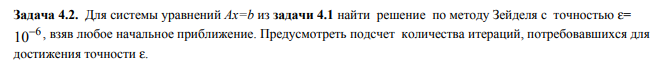

In [8]:
Image("Lab4_2.png")

In [9]:
x_0 = np.ones(A.shape[0])
print("Начальное приближение = ", x_0)
x_zeidel_1_2 = Zeidel(A, b, x_0)
x_0 = np.zeros(A.shape[0])
print("Начальное приближение = ", x_0)
x_zeidel_2_2 = Zeidel(A, b, x_0)

Начальное приближение =  [1. 1. 1. 1. 1.]
Заданная точность достигнута через  48  итераций
Начальное приближение =  [0. 0. 0. 0. 0.]
Заданная точность достигнута через  47  итераций


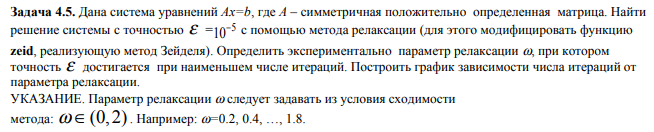

In [10]:
Image("Lab4_5.png")

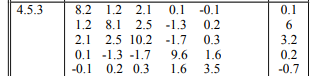

In [11]:
Image("Lab4_53.png")

In [12]:
def relax(A, b, x0, om, eps = 1e-5, it_num = 20000):
    L = np.tril(A, k = -1)
    D = np.diag(np.diag(A))
    U = np.triu(A, k = 1)
    L_D_inv = solve_triangular(L+D,np.eye(A.shape[0]), lower = True)
    count = 0
    x_curr = x0
    x_next = -np.dot(np.dot(L_D_inv,U),x_curr) + np.dot(L_D_inv,b) - x_curr*(om-1)
    while count != it_num and np.max(np.abs(x_next - x_curr)) > eps:
        x_curr = x_next
        count += 1
        x_next = -np.dot(np.dot(L_D_inv,U),x_curr) + np.dot(L_D_inv,b) - x_curr*(om-1)
    if count == it_num:
        print("Количество итераций превышено")
    else: print("Заданная точность достигнута через ", count, "итераций ")
    return count

A = np.array([[ 8.2, 1.2, 2.1, 0.1, -0.1], [1.2, 8.1, 2.5, -1.3, 0.2], [ 2.1, 2.5, 10.2, -1.7, 0.3], [0.1, -1.3, -1.7, 9.6, 1.6], [-0.1, 0.2, 0.3, 1.6, 3.5]])
b = np.array([0.1, 6, 3.2, 0.2, -0.7])
print(A)
print(b)

[[ 8.2  1.2  2.1  0.1 -0.1]
 [ 1.2  8.1  2.5 -1.3  0.2]
 [ 2.1  2.5 10.2 -1.7  0.3]
 [ 0.1 -1.3 -1.7  9.6  1.6]
 [-0.1  0.2  0.3  1.6  3.5]]
[ 0.1  6.   3.2  0.2 -0.7]


In [13]:
import matplotlib.pyplot as plt
x_0 = np.ones(A.shape[0])
print("Начальное приближение = ", x_0)
param_om = np.arange(0,2.2,0.2)
kol_iter = []
for ome in param_om:
    k = relax(A, b, x_0, ome)
    kol_iter.append(k)
plt.figure(figsize=(20,10))
plt.plot(param_om, kol_iter)
plt.scatter(param_om, kol_iter, c = 'r')
plt.title("зависимость количества итераций  от параметра Омега.")
plt.xlabel("Омега")
plt.ylabel("Количество итераций");

Начальное приближение =  [1. 1. 1. 1. 1.]
Заданная точность достигнута через  5461 итераций 
Заданная точность достигнута через  185 итераций 
Заданная точность достигнута через  40 итераций 
Заданная точность достигнута через  21 итераций 
Заданная точность достигнута через  12 итераций 
Заданная точность достигнута через  7 итераций 
Заданная точность достигнута через  10 итераций 


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in subtract
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Заданная точность достигнута через  18 итераций 
Заданная точность достигнута через  33 итераций 
Заданная точность достигнута через  77 итераций 
Количество итераций превышено


Экспериментально было выявлено,что наименьшее число итераций достигается при Омега равном 1.Это видно и на графике.

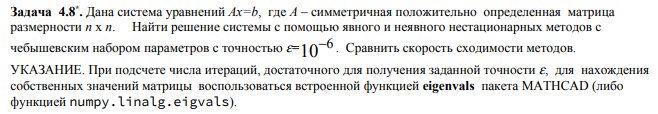

In [14]:
Image("Lab4_8.png")

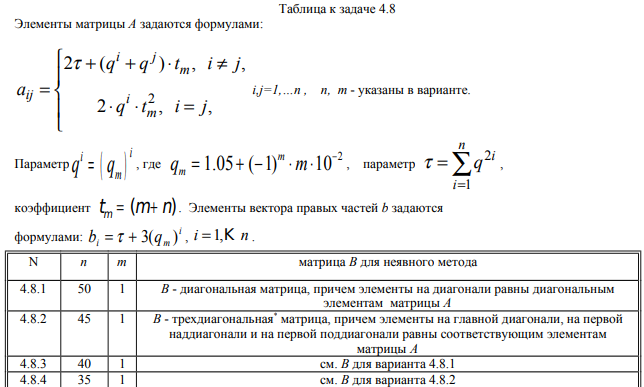

In [15]:
Image("Lab4_84.png")

In [16]:
#Явный метод
def yav(A,B, eps=1e-6, iterations=100):
    x = np.zeros(B.shape[0])
    x = x.reshape(-1,1)
    e = np.linalg.eigvals(A)
    max_e = np.max(e)
    min_e = np.min(e)
    b = B.copy().reshape(-1,1)
    x_prev = x.copy()
    for i in range(iterations):
        gamma = 2 / (max_e + min_e) / (1 + (1 - min_e / max_e) \
        /(1 + min_e / max_e) * np.cos(np.pi * (2 * i - 1)/(2 * iterations)))
        x = gamma * (b - np.dot(A,x_prev)) + x_prev
        if np.linalg.norm(x - x_prev) < eps:
            return (x,i)
        x_prev = x.copy()
    return (x,iterations)

#Неявный метод
def neyav(A,A1,B, eps=1e-6, iterations=100):
    x = np.zeros(B.shape[0])
    x = x.reshape(-1,1)
    A1_inv = np.linalg.inv(A1)#A1 - вспомогательная матрица
    e = np.linalg.eigvals(np.dot(A1_inv, A))
    max_e = np.max(e)
    min_e = np.min(e)
    b = B.copy().reshape(-1,1)
    x_prev = x.copy()
    for i in range(iterations):
        gamma = 2 / (max_e + min_e) / (1 + (1 - min_e / max_e) \
        /(1 + min_e / max_e) * np.cos(np.pi * (2 * i - 1)/(2 * iterations)))
        x = gamma * np.dot(A1_inv,(b - np.dot(A,x_prev))) + x_prev
        if np.linalg.norm(x - x_prev) < eps:
            return (x,i)
        x_prev = x.copy()
    return (x,iterations)

In [32]:
n = 35
M = np.eye(35)
q = 1.05 - 1 * 0.01
t = 1 + n
tau = np.sum ( q ** (2 * i) for i in range(1,36))
f = np.zeros(n)
for i in range(n):
    for j in range(n):
        if i == j:
            M[i,j] = 2 * q ** i * t ** 2
        else: 
            M[i,j] = 2 * tau + (q ** i + q ** j) * t
    f[i] = tau + 3 * q ** i

y_np = np.linalg.solve(M,f)
print("Ответ с помощью встроенных функций", y_np)
x_ch, it = yav(M,f)
print('Ответ с помощью явного метода: ', x_ch)
print('Количество итераций: ', it)
M_ = M - np.tril(M,-2) - np.triu(M,2)
x_ch1, it = neyav(M,M_,f)
print('Ответ с помощью неявного метода: ', x_ch1)
print('Количество итераций: ', it)


Ответ с помощью встроенных функций [0.02041279 0.01934163 0.01832554 0.01736111 0.01644518 0.01557484
 0.01474739 0.01396032 0.01321131 0.01249821 0.011819   0.0111718
 0.01055487 0.00996658 0.0094054  0.0088699  0.00835874 0.00787066
 0.00740449 0.00695912 0.00653351 0.00612668 0.00573771 0.00536571
 0.00500988 0.00466944 0.00434366 0.00403185 0.00373334 0.00344752
 0.00317382 0.00291166 0.00266052 0.00241991 0.00218934]
Ответ с помощью явного метода:  [[0.0204104 ]
 [0.0193405 ]
 [0.01832515]
 [0.01736111]
 [0.01644538]
 [0.01557512]
 [0.01474768]
 [0.0139606 ]
 [0.01321156]
 [0.01249843]
 [0.01181919]
 [0.01117196]
 [0.01055502]
 [0.00996671]
 [0.00940551]
 [0.00887   ]
 [0.00835883]
 [0.00787074]
 [0.00740457]
 [0.0069592 ]
 [0.00653358]
 [0.00612674]
 [0.00573776]
 [0.00536577]
 [0.00500994]
 [0.00466949]
 [0.00434371]
 [0.00403189]
 [0.00373338]
 [0.00344756]
 [0.00317385]
 [0.00291169]
 [0.00266055]
 [0.00241994]
 [0.00218937]]
Количество итераций:  60
Ответ с помощью неявного м

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """


Скорость сходимости неявного метода выше,чем у явного